# Data Dictionary for the Housing dataset

1. id - Unique ID for each home sold
2. date - Date of the home sale
3. price - Price of each home sold
4. bedrooms - Number of bedrooms
5. bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. sqft_living - Square footage of the apartments interior living space
7. sqft_lot - Square footage of the land space
8. floors - Number of floors
9. waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
10. view - An index from 0 to 4 of how good the view of the property was
11. condition - An index from 1 to 5 on the condition of the apartment,
12. grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 13. 11-13 have a high quality level of construction and design.
14. sqft_above - The square footage of the interior housing space that is above ground level
15. sqft_basement - The square footage of the interior housing space that is below ground level
16. yr_built - The year the house was initially built
17. yr_renovated - The year of the house’s last renovation
18. zipcode - What zipcode area the house was listed in
19. lat - Latitude
20. long - Longitude
21. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
22. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


# Features to use 

Bedrooms, Bathrooms, sqft_living, sqft_lot, floors, grade, sft_above,  zip_code, sft_living15, sqft_lot15, lat, long  

In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [267]:
url='https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv'
housing = pd.read_csv(url)
housing.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


In [268]:
housing.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [269]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

In [270]:
housing.shape

(20000, 21)

In [271]:
housing.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,2.000000e+04
mean,4.580297e+09,3.370200,2.115750,2079.883100,1.501533e+04,1.49645,0.007550,0.234900,3.409700,7.657700,1790.232900,289.650200,1971.100150,82.732150,98077.876850,47.559970,-122.213897,1986.387500,12748.96040,5.394367e+05
std,2.875295e+09,0.931931,0.770134,919.433672,3.970135e+04,0.54095,0.086564,0.767692,0.651895,1.175287,829.587101,441.537072,29.374008,397.872344,53.438026,0.138517,0.140649,685.211515,27076.48904,3.664334e+05
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.00000,7.500000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.750000,0.000000,98033.000000,47.470675,-122.328000,1490.000000,5100.00000,3.220000e+05
50%,3.904955e+09,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571450,-122.230000,1840.000000,7622.00000,4.500000e+05
75%,7.309825e+09,4.000000,2.500000,2550.000000,1.071000e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2360.000000,10088.25000,6.416250e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.164794e+06,3.50000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.00000,7.700000e+06


In [272]:
housing['sqft_basement'].value_counts()

0       12180
600       207
700       205
500       192
800       191
        ...  
2570        1
906         1
2050        1
946         1
2250        1
Name: sqft_basement, Length: 301, dtype: int64

In [273]:
# Create a new column called 'price_per_sqft' that is the price per square foot of the house
housing['price_per_sqft_lot'] = housing['price'] / housing['sqft_lot']
housing['price_per_sqft_living'] = housing['price'] / housing['sqft_living']
housing['price_per_sqft_above'] = housing['price'] / housing['sqft_above']


housing.describe()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,price_per_sqft_lot,price_per_sqft_living,price_per_sqft_above
count,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,4.580297e+09,3.370200,2.115750,2079.883100,1.501533e+04,1.49645,0.007550,0.234900,3.409700,7.657700,...,82.732150,98077.876850,47.559970,-122.213897,1986.387500,12748.96040,5.394367e+05,89.023563,263.952817,314.264591
std,2.875295e+09,0.931931,0.770134,919.433672,3.970135e+04,0.54095,0.086564,0.767692,0.651895,1.175287,...,397.872344,53.438026,0.138517,0.140649,685.211515,27076.48904,3.664334e+05,94.119550,109.808969,146.782028
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.00000,7.500000e+04,0.163119,87.588235,87.588235
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98033.000000,47.470675,-122.328000,1490.000000,5100.00000,3.220000e+05,33.223245,182.296519,206.317447
50%,3.904955e+09,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98065.000000,47.571450,-122.230000,1840.000000,7622.00000,4.500000e+05,59.217233,244.650734,280.000000
75%,7.309825e+09,4.000000,2.500000,2550.000000,1.071000e+04,2.00000,0.000000,0.000000,4.000000,8.000000,...,0.000000,98117.000000,47.678000,-122.124000,2360.000000,10088.25000,6.416250e+05,107.615874,317.955056,390.918887
max,9.900000e+09,33.000000,8.000000,13540.000000,1.164794e+06,3.50000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.00000,7.700000e+06,2027.208539,810.138889,1341.463415


In [274]:
housing['total_sqft'] = housing['sqft_living'] + housing['sqft_lot'] + housing['sqft_above']

housing['price_per_sqft_total'] = housing['price'] / housing['total_sqft']
housing.describe()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,price,price_per_sqft_lot,price_per_sqft_living,price_per_sqft_above,total_sqft,price_per_sqft_total
count,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.00000,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000
mean,4.580297e+09,3.370200,2.115750,2079.883100,1.501533e+04,1.49645,0.007550,0.234900,3.409700,7.657700,...,47.559970,-122.213897,1986.387500,12748.96040,5.394367e+05,89.023563,263.952817,314.264591,1.888544e+04,47.967328
std,2.875295e+09,0.931931,0.770134,919.433672,3.970135e+04,0.54095,0.086564,0.767692,0.651895,1.175287,...,0.138517,0.140649,685.211515,27076.48904,3.664334e+05,94.119550,109.808969,146.782028,4.005765e+04,32.557487
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,1.000000,...,47.155900,-122.519000,399.000000,651.00000,7.500000e+04,0.163119,87.588235,87.588235,2.013000e+03,0.162920
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,...,47.470675,-122.328000,1490.000000,5100.00000,3.220000e+05,33.223245,182.296519,206.317447,8.541750e+03,24.643043
50%,3.904955e+09,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,...,47.571450,-122.230000,1840.000000,7622.00000,4.500000e+05,59.217233,244.650734,280.000000,1.130000e+04,39.625537
75%,7.309825e+09,4.000000,2.500000,2550.000000,1.071000e+04,2.00000,0.000000,0.000000,4.000000,8.000000,...,47.678000,-122.124000,2360.000000,10088.25000,6.416250e+05,107.615874,317.955056,390.918887,1.510275e+04,63.736866
max,9.900000e+09,33.000000,8.000000,13540.000000,1.164794e+06,3.50000,1.000000,4.000000,5.000000,13.000000,...,47.777600,-121.315000,6210.000000,871200.00000,7.700000e+06,2027.208539,810.138889,1341.463415,1.166214e+06,279.456193


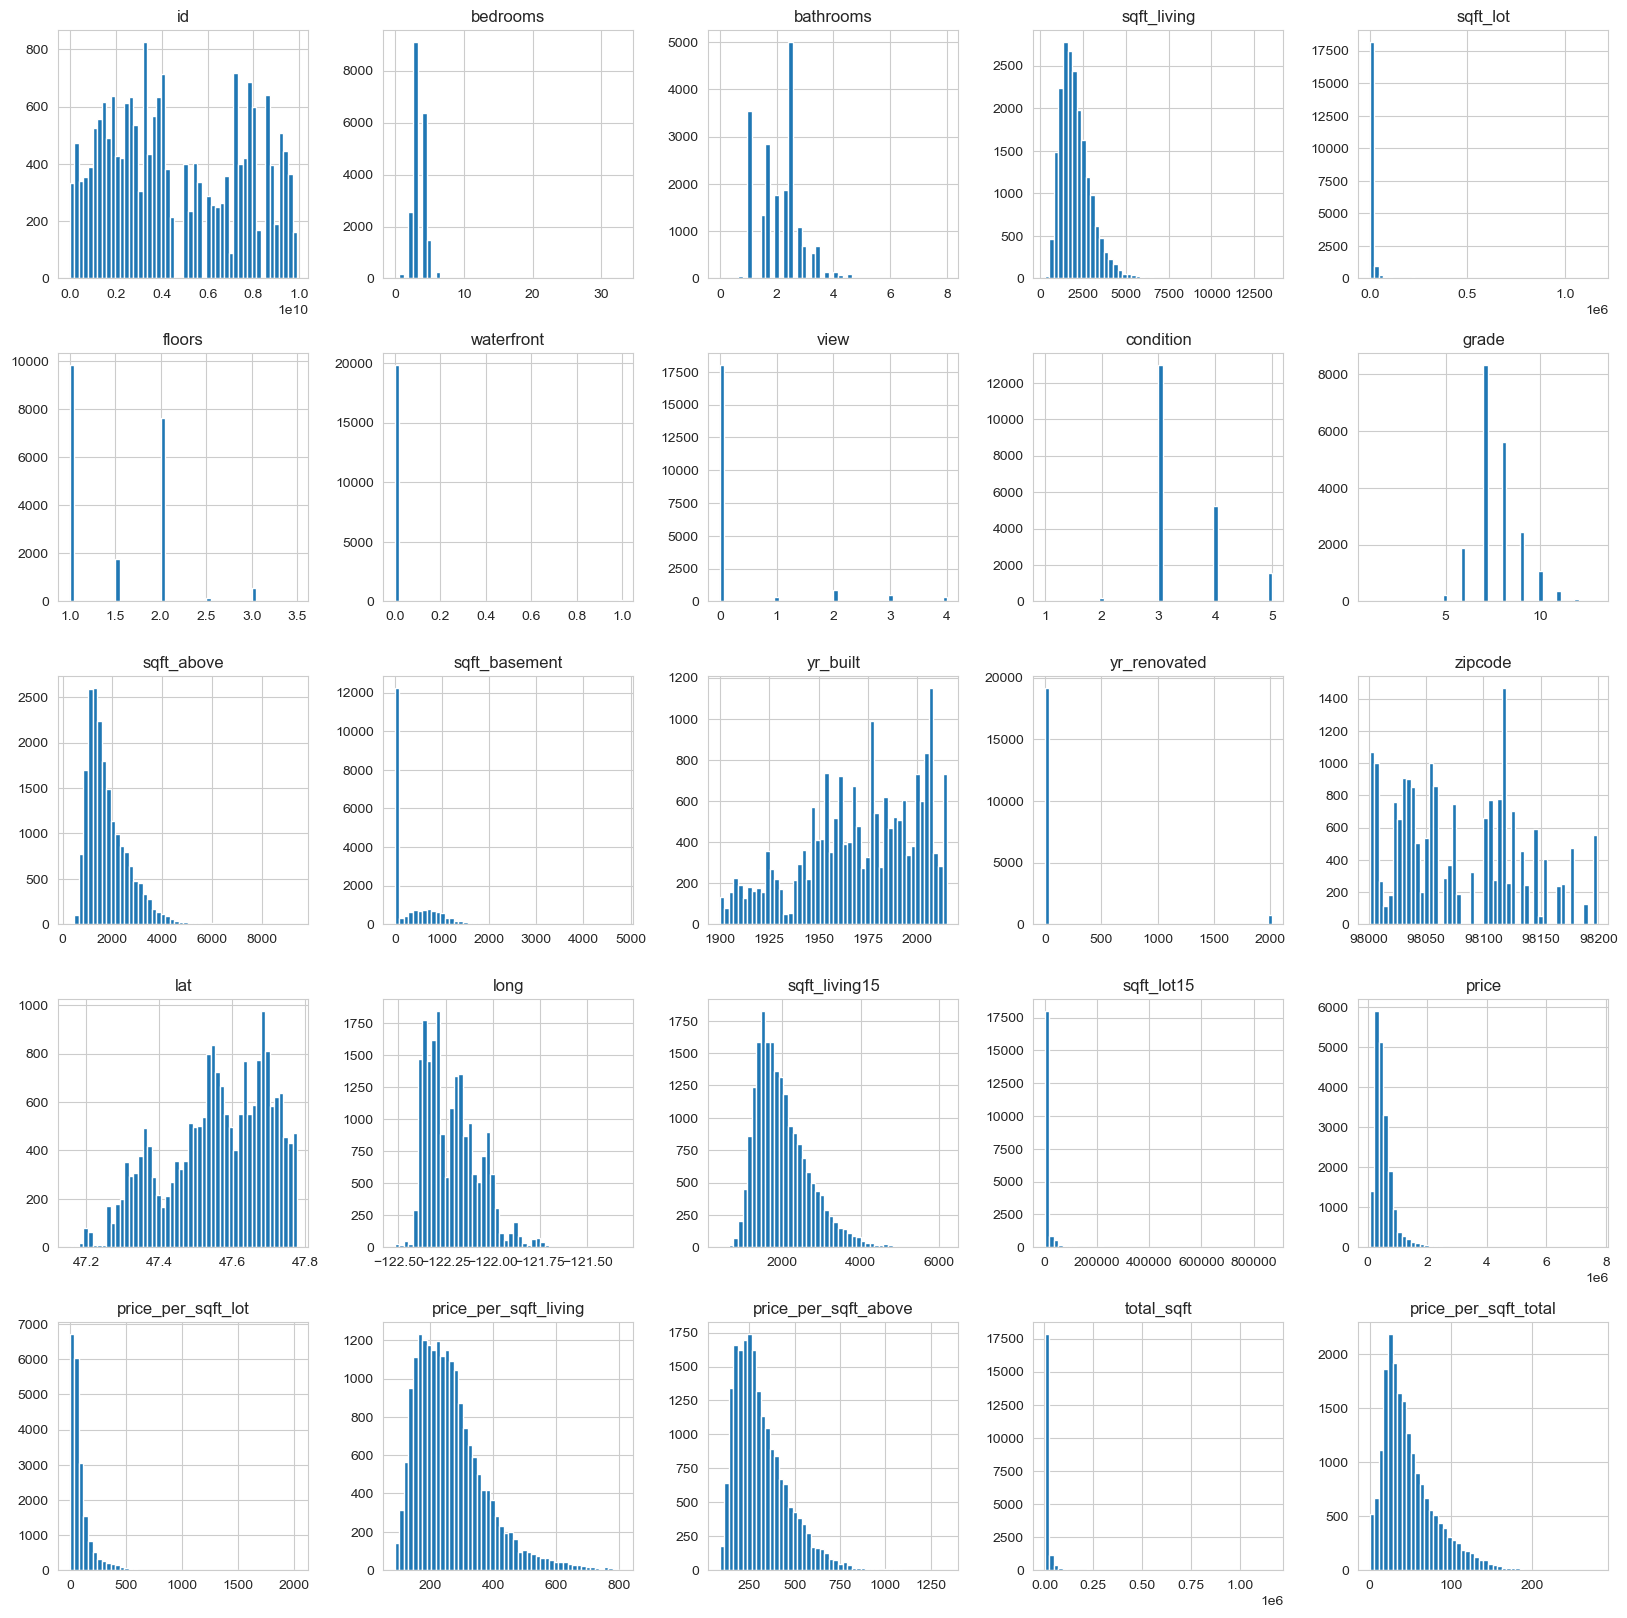

In [275]:
# Plot Histograms with Seaborn
sns.set_style('whitegrid')
housing.hist(bins=50, figsize=(20,20))
plt.show()


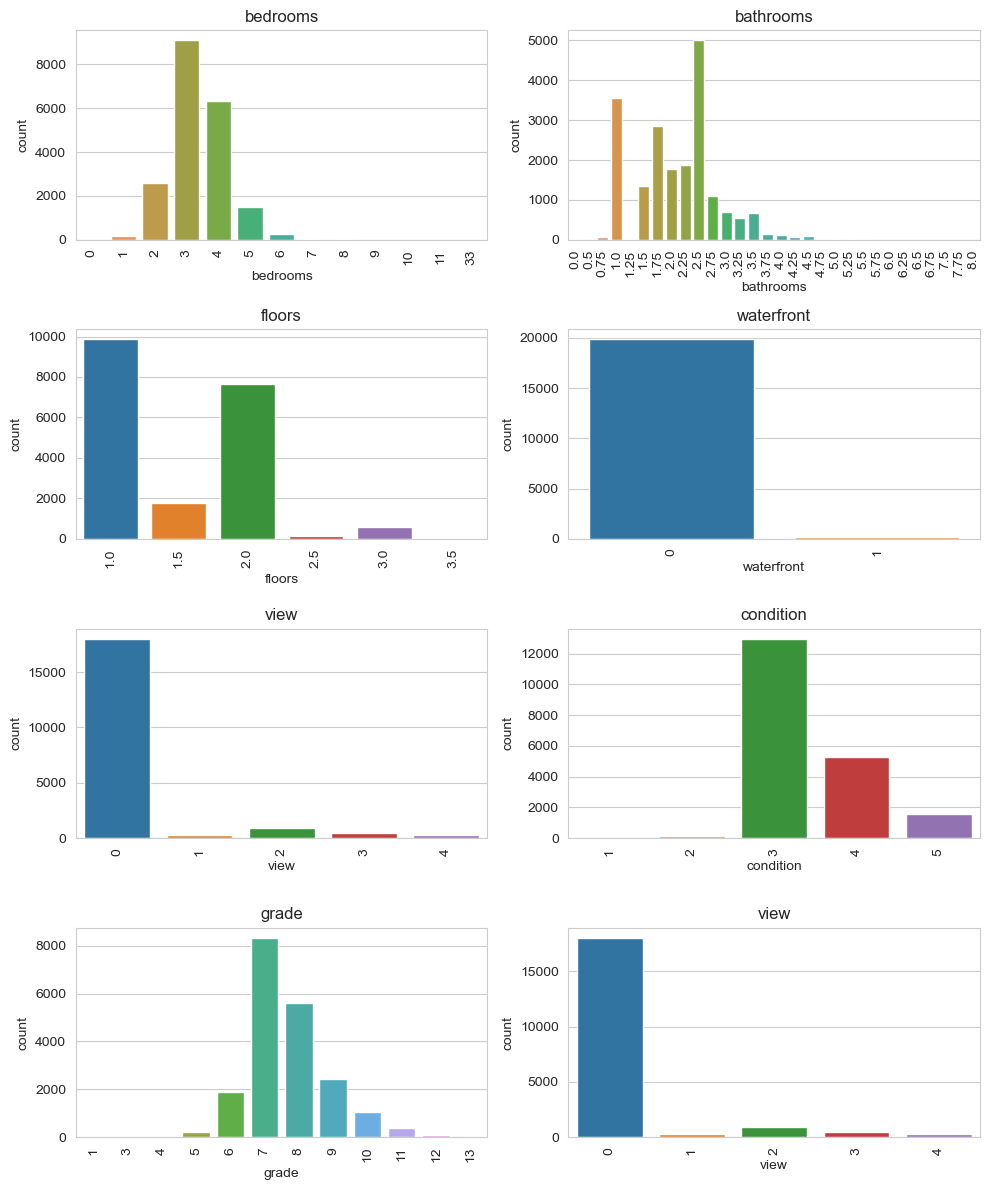

In [276]:
# Bar Plot of value count 

features = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'view']
ncols = 2
nrows = len(features) // ncols + (len(features) % ncols> 0) 
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*3))

for i, feature in enumerate(features):
    row = i // ncols
    col = i % ncols
    ax[row][col].set_title(feature)
    sns.countplot(x=feature, data=housing, ax=ax[row][col]) 
    ax[row][col].set_xticklabels(ax[row][col].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


In [277]:
# find the max Year for year_builr 
last_year = housing['yr_built'].max()
first_year = housing['yr_built'].min()
print('First Year: ', first_year)
print('Last Year: ', last_year)


First Year:  1900
Last Year:  2015


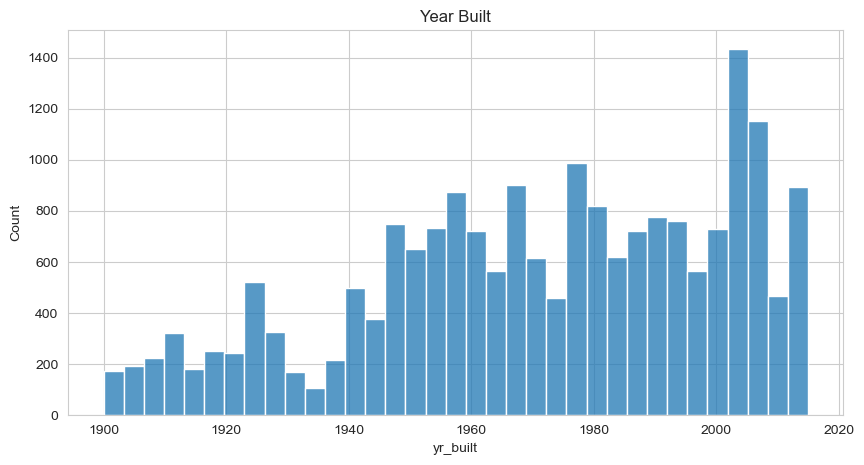

In [278]:
plt.figure(figsize=(10,5))
plt.title('Year Built')
sns.histplot(x='yr_built', data=housing)
plt.show()



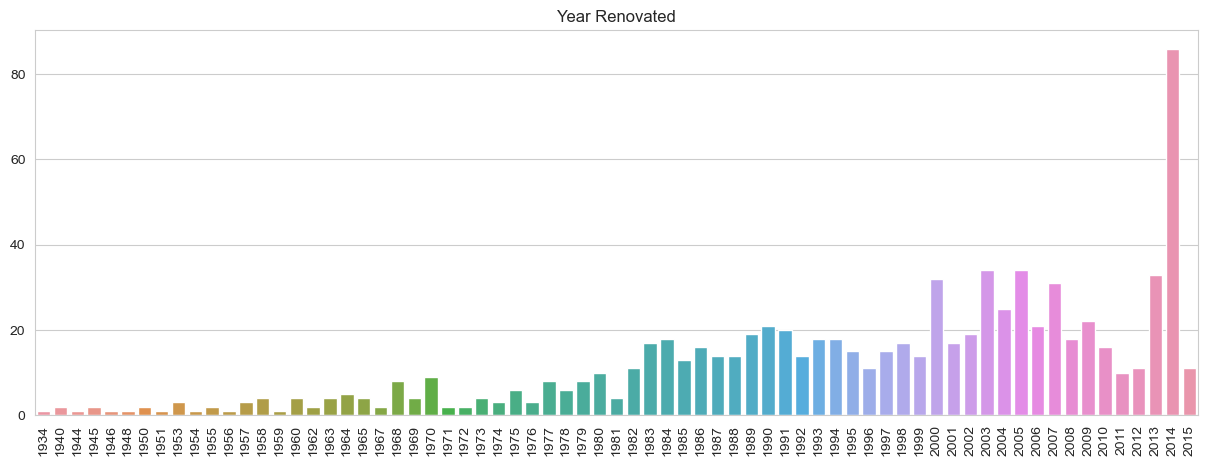

In [279]:
yr_renovated = housing['yr_renovated']
renovated_count = yr_renovated[yr_renovated>0].value_counts()

# Plot the renovated count
plt.figure(figsize=(15,5))
plt.title('Year Renovated')
sns.barplot(x=renovated_count.index, y=renovated_count.values)
plt.xticks(rotation=90)
plt.show()


In [280]:
housing['grade'].value_counts()

short = [1,2,3]
average = [4,5,6,7,8,9,10]
high=[ 11,12,13]

def grade_cat(grade):
    if grade in short:
        return 'short'
    elif grade in average:
        return 'average'
    else:
        return 'high'

housing['grade_cat'] = housing['grade'].apply(grade_cat)

housing['grade_cat'].value_counts()

average    19534
high         462
short          4
Name: grade_cat, dtype: int64

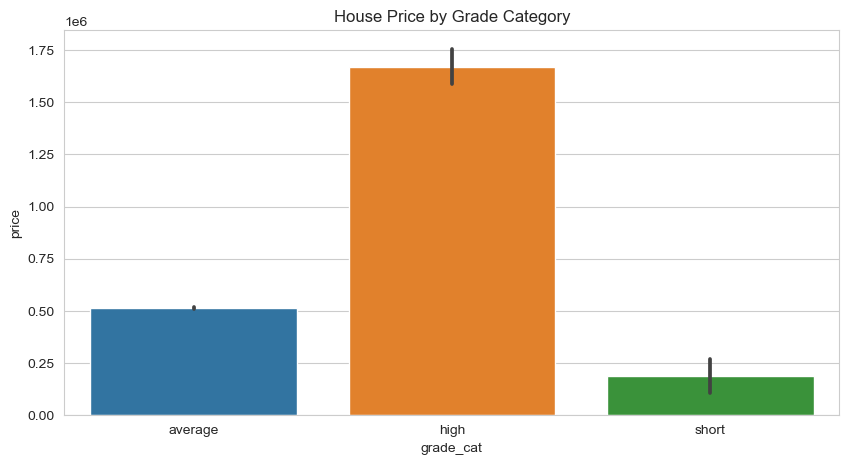

In [281]:
# Plot line chart the House Price by Grade Category
plt.figure(figsize=(10,5))
plt.title('House Price by Grade Category')
sns.barplot(x='grade_cat', y='price', data=housing)
plt.show()


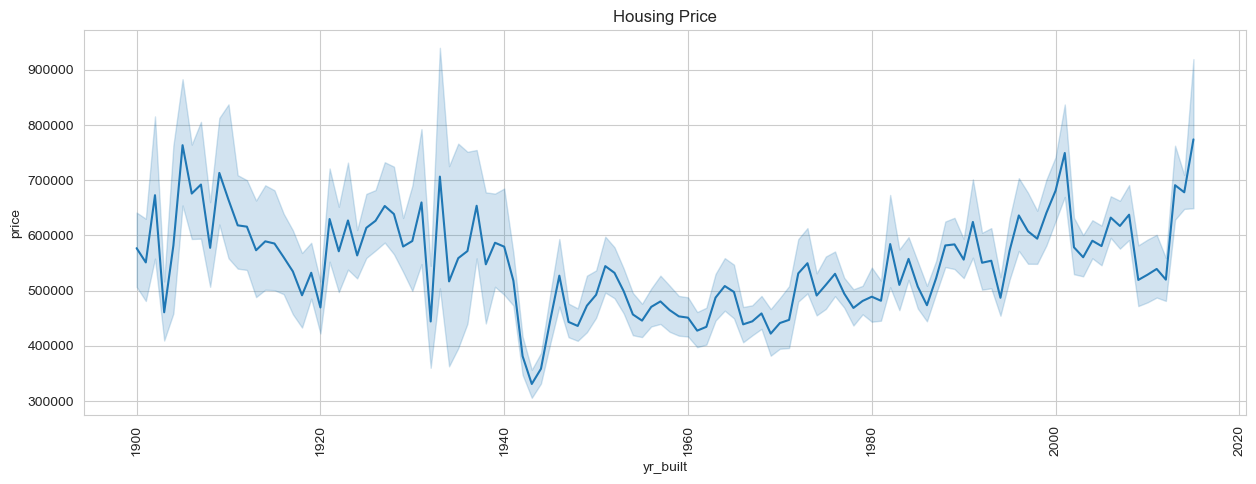

In [282]:
plt.figure(figsize=(15,5))
plt.title('Housing Price')
sns.lineplot(x='yr_built', y='price', data=housing)
plt.xticks(rotation=90)
plt.show()


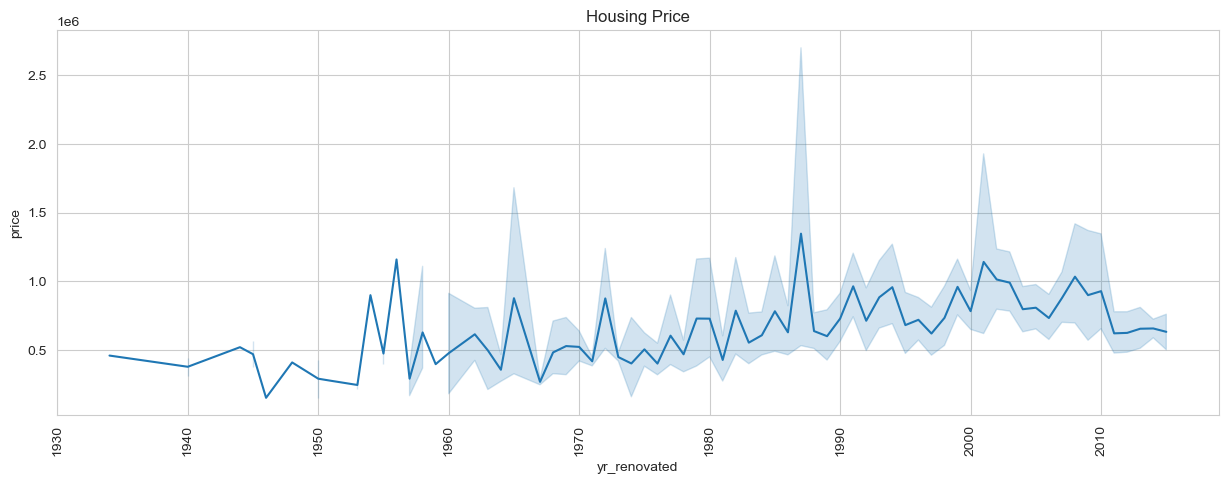

In [283]:
plt.figure(figsize=(15,5))
plt.title('Housing Price')
sns.lineplot(x='yr_renovated', y='price', data=housing[housing['yr_renovated']>0])
plt.xticks(rotation=90)
plt.show()


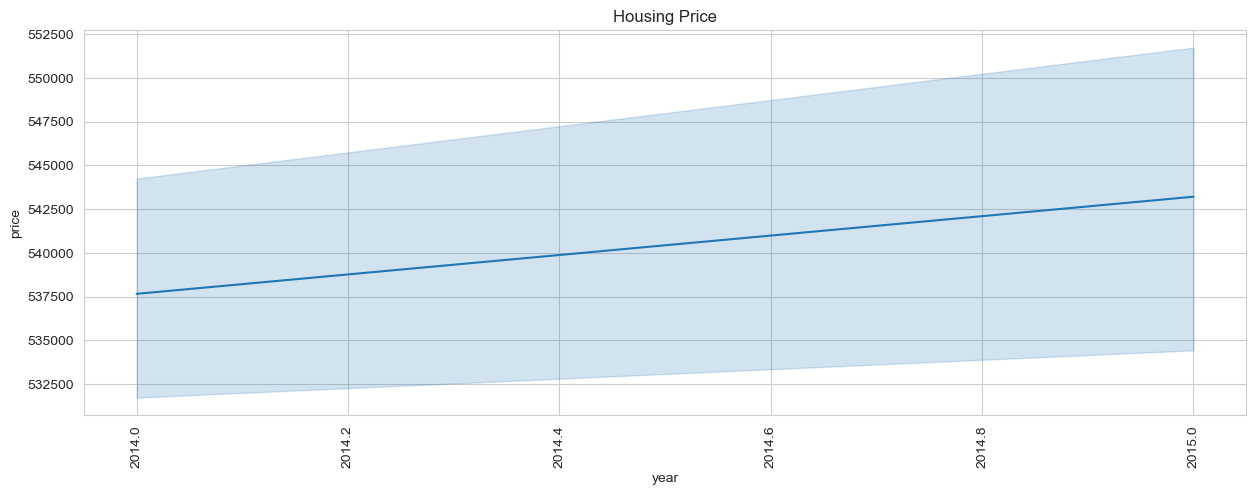

In [284]:
housing['year']=  pd.to_datetime(housing['date']).dt.year

# Line plot for date and price 

plt.figure(figsize=(15,5))
plt.title('Housing Price')
sns.lineplot(x='year', y='price', data=housing)
plt.xticks(rotation=90)
plt.show()



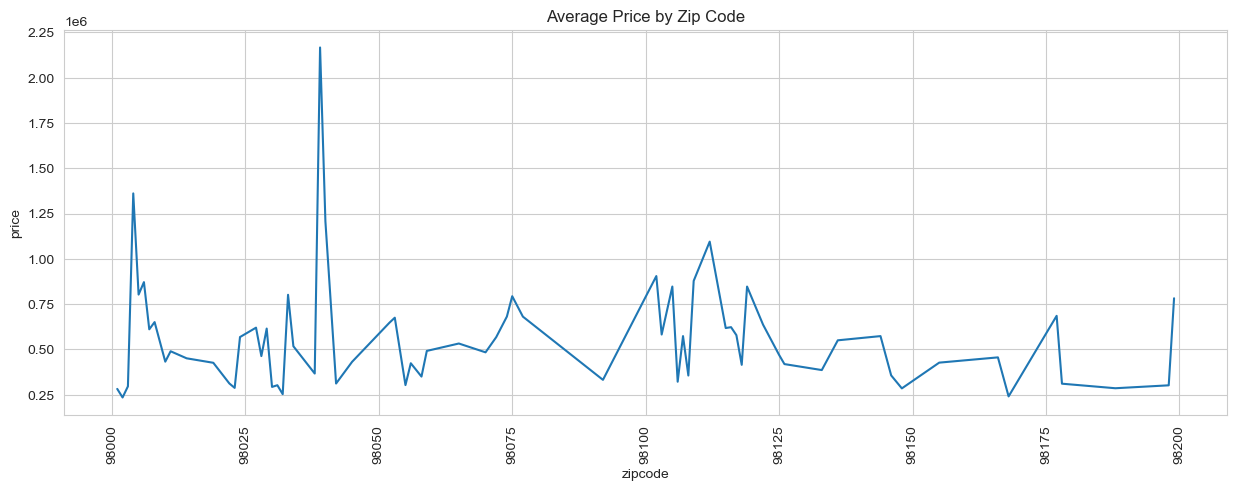

In [285]:

# Group the data by zip code and calculate the average price
grouped = housing.groupby('zipcode').mean()

# Plot the average price for each zip code
plt.figure(figsize=(15,5))
plt.title('Average Price by Zip Code')
sns.lineplot(x=grouped.index, y=grouped['price'])
plt.xticks(rotation=90)
plt.show()





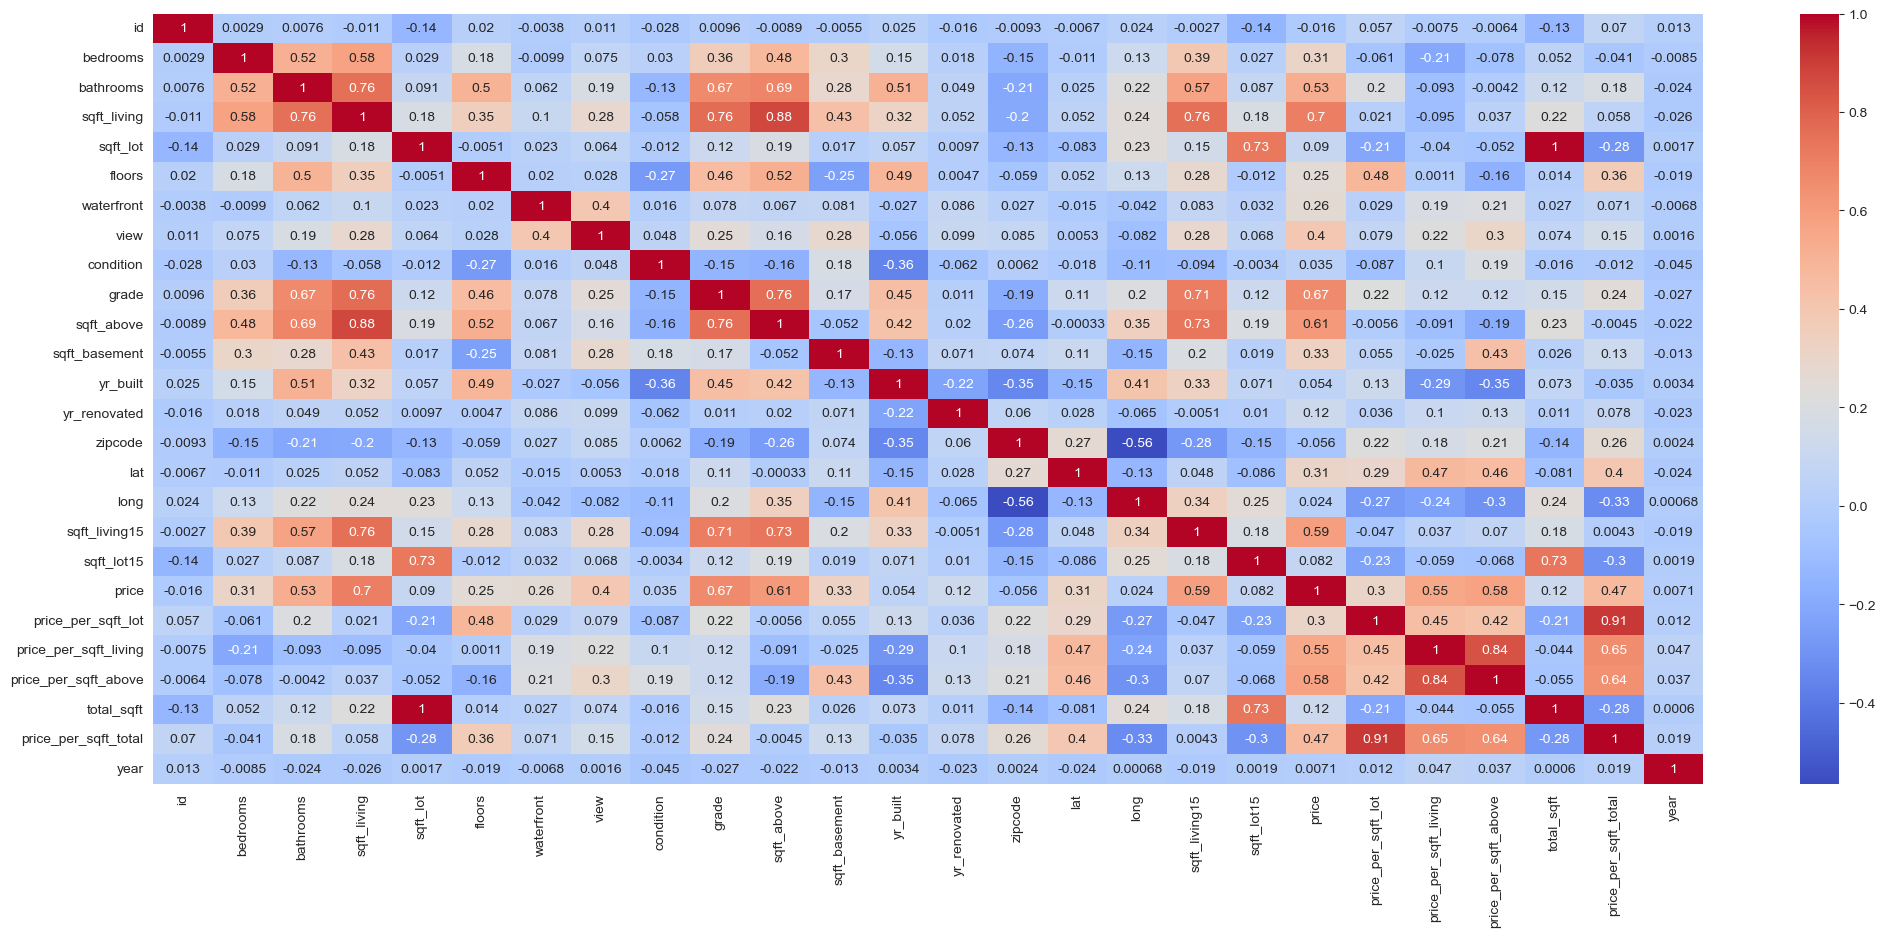

In [286]:
corr = housing.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

bedrooms,bathrooms, sqft_living, floor, waterfront, view, grade, sqft_above, sqft_living_15,

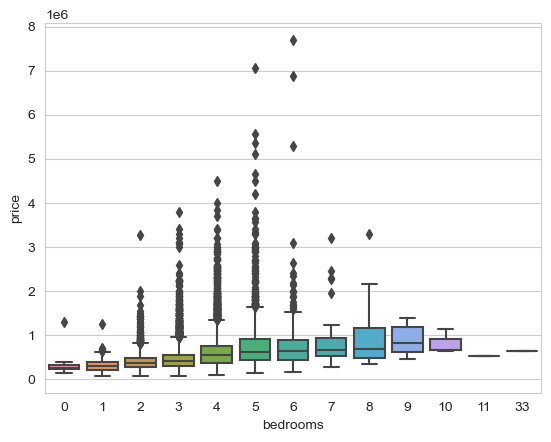

In [287]:

sns.boxplot(x='bedrooms', y='price', data=housing)
plt.show()


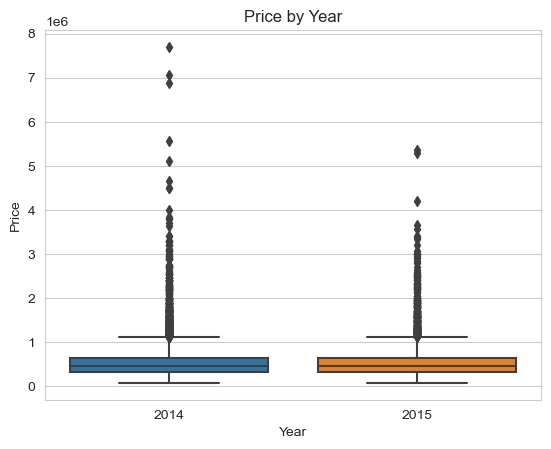

In [288]:
# Plot the box plot of price by year
sns.boxplot(x='year', y='price', data=housing)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price by Year')
plt.show()


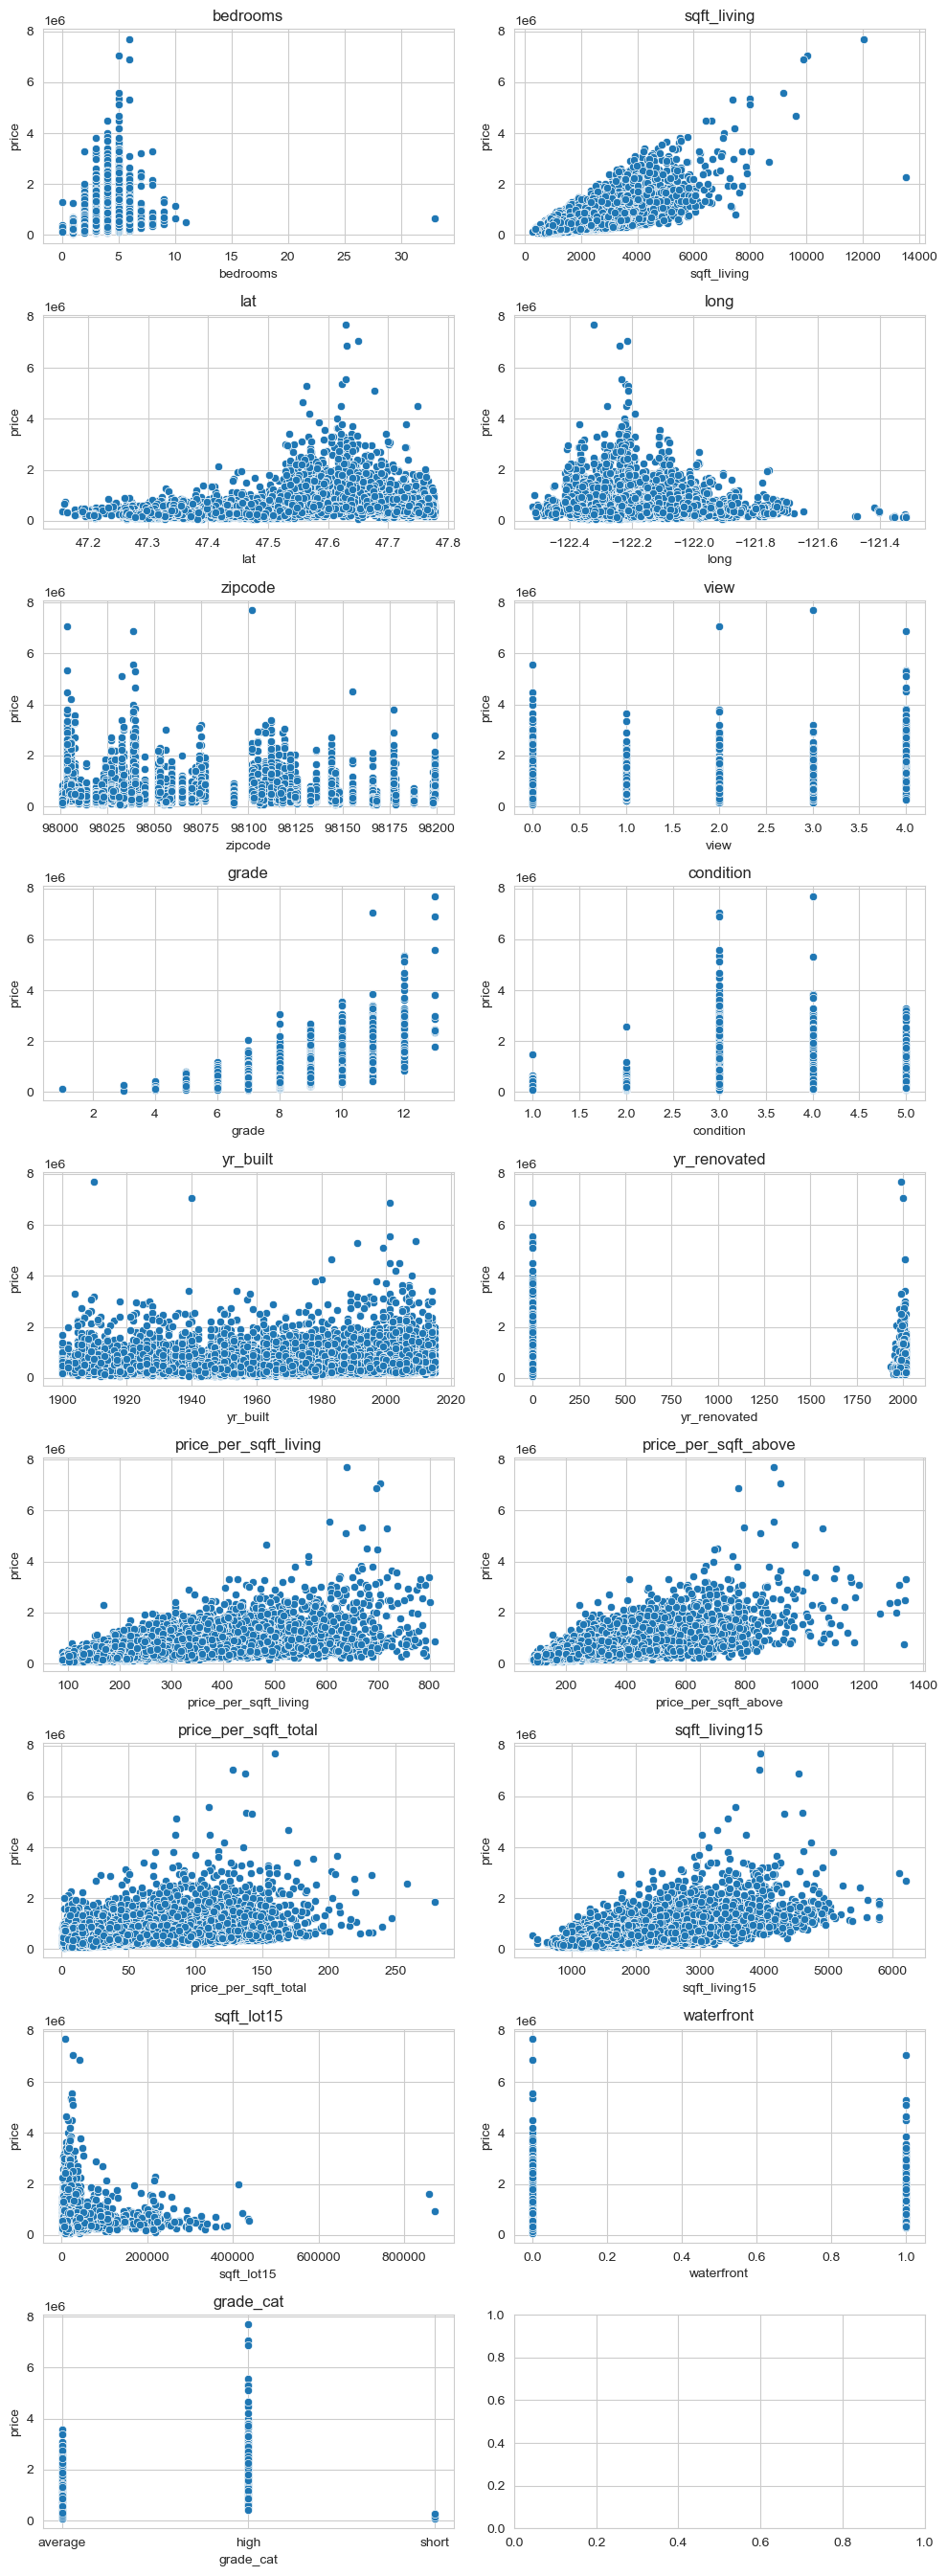

In [289]:
# Create a scatter plot of price and bedrooms , price and sqft_living, lat and Price, long and price
features = ['bedrooms', 'sqft_living', 'lat', 'long', 'zipcode', 'view', 'grade', 'condition', 'yr_built', 'yr_renovated', 'price_per_sqft_living', 'price_per_sqft_above', 'price_per_sqft_total', 'sqft_living15', 'sqft_lot15', 'waterfront', 'grade_cat']
ncols = 2
nrows = len(features) // ncols + (len(features) % ncols> 0)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*3))

for i, feature in enumerate(features):
    row = i // ncols
    col = i % ncols
    ax[row][col].set_title(feature)
    sns.scatterplot(x=feature, y='price', data=housing, ax=ax[row][col])
plt.tight_layout()
plt.show()



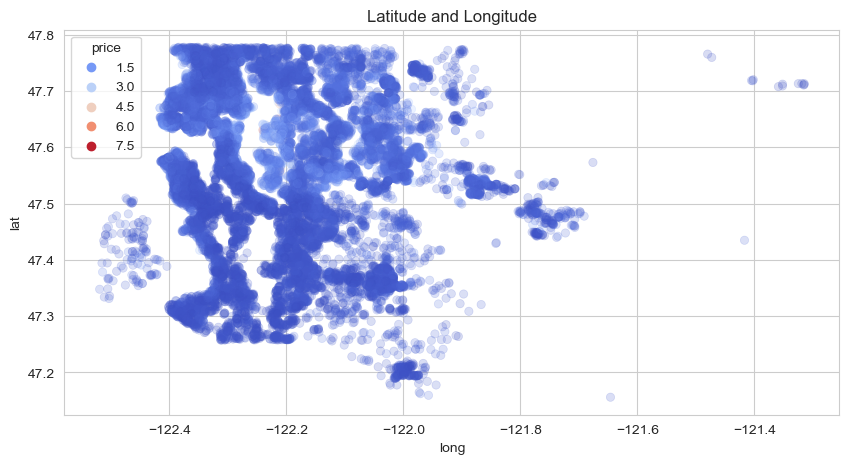

In [290]:
# plot the scatter for lat and long and hue price with shapes 
plt.figure(figsize=(10,5))
plt.title('Latitude and Longitude')
sns.scatterplot(x='long', y='lat', data=housing, hue='price', palette='coolwarm', edgecolor=None, alpha=0.2)
plt.show()



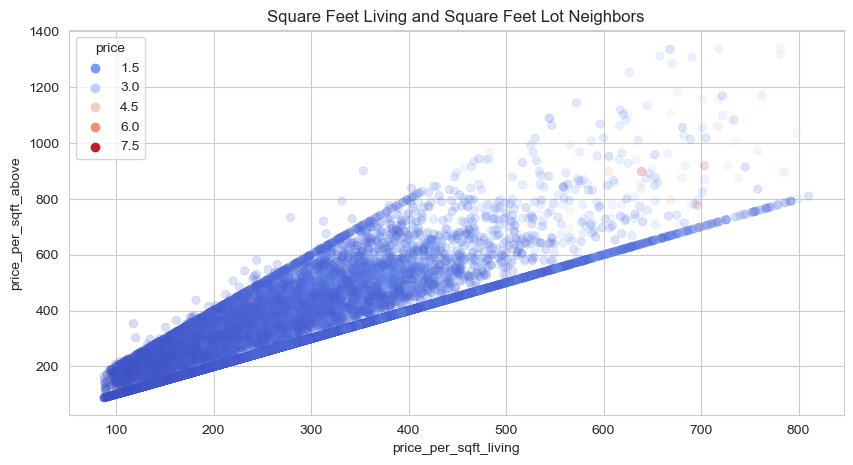

In [291]:
plt.figure(figsize=(10,5))
plt.title('Square Feet Living and Square Feet Lot Neighbors')
sns.scatterplot(x='price_per_sqft_living', y='price_per_sqft_above', data=housing, hue='price', palette='coolwarm', edgecolor=None, alpha=0.2)
plt.show()


In [353]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
           'grade', 'sqft_above', 'zip_enc', 'sqft_living15',
           'lat', 'long']


In [354]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [355]:
encoder = OneHotEncoder() 
scaler = MinMaxScaler()

housing['zipcode'] = housing['zipcode'].astype('category')
housing['zip_enc'] = housing['zipcode'].cat.codes 

housing['grade_cat'] = housing['grade_cat'].astype('category')
housing['grade_cat_enc'] = housing['grade_cat'].cat.codes
housing.head()


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,price,price_per_sqft_lot,price_per_sqft_living,price_per_sqft_above,total_sqft,price_per_sqft_total,grade_cat,year,zip_enc,grade_cat_enc
0,1565930130,20141104T000000,0.121212,0.40625,0.261887,0.003569,0.4,0,0,3,...,429900.0,91.957219,0.037017,0.055276,11175,38.469799,average,2014,23,0
1,3279000420,20150115T000000,0.090909,0.21875,0.088302,0.006253,0.0,0,0,2,...,233000.0,29.871795,0.099648,0.108823,10300,22.621359,average,2015,13,0
2,194000575,20141014T000000,0.121212,0.12500,0.079245,0.004535,0.2,0,2,3,...,455000.0,78.448276,0.348715,0.200948,8480,53.655660,average,2014,50,0
3,2115510160,20141208T000000,0.090909,0.21875,0.086792,0.006468,0.0,0,0,3,...,258950.0,32.167702,0.127656,0.073562,10930,23.691674,average,2014,13,0
4,7522500005,20140815T000000,0.060606,0.18750,0.112453,0.003633,0.0,0,0,4,...,555000.0,116.842105,0.310303,0.339987,7610,72.930355,average,2014,51,0


In [356]:
zips = housing['grade_cat_enc'].unique()
zips

array([0, 1, 2], dtype=int8)

In [357]:
scale_features =  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','sqft_above', 'sqft_living15',
           'lat', 'long']
housing[scale_features] = scaler.fit_transform(housing[scale_features])

housing.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,price,price_per_sqft_lot,price_per_sqft_living,price_per_sqft_above,total_sqft,price_per_sqft_total,grade_cat,year,zip_enc,grade_cat_enc
0,1565930130,20141104T000000,0.121212,0.40625,0.261887,0.003569,0.4,0,0,3,...,429900.0,91.957219,0.037017,0.055276,11175,38.469799,average,2014,23,0
1,3279000420,20150115T000000,0.090909,0.21875,0.088302,0.006253,0.0,0,0,2,...,233000.0,29.871795,0.099648,0.108823,10300,22.621359,average,2015,13,0
2,194000575,20141014T000000,0.121212,0.12500,0.079245,0.004535,0.2,0,2,3,...,455000.0,78.448276,0.348715,0.200948,8480,53.655660,average,2014,50,0
3,2115510160,20141208T000000,0.090909,0.21875,0.086792,0.006468,0.0,0,0,3,...,258950.0,32.167702,0.127656,0.073562,10930,23.691674,average,2014,13,0
4,7522500005,20140815T000000,0.060606,0.18750,0.112453,0.003633,0.0,0,0,4,...,555000.0,116.842105,0.310303,0.339987,7610,72.930355,average,2014,51,0


In [358]:
X_train, X_test, y_train, y_test = train_test_split(housing[model_features], housing['price'], test_size=0.2, random_state=0)

In [359]:
param_grid = {
    'max_depth': [2, 4, 8, 10, None],
}



In [367]:
xg_model = xgb.XGBRegressor(max_depth=10)
xg_model.fit(X_train, y_train)

y_pred_xg = xg_model.predict(X_test)

print('R2 Score: ', r2_score(y_test, y_pred_xg))
print('MAE: ', mean_absolute_error(y_test, y_pred_xg))
print('MSE: ', mean_squared_error(y_test, y_pred_xg))

# PRint types of X_Train
print(y_pred_xg)

R2 Score:  0.8476880879417501
MAE:  76385.48444726563
MSE:  20469477035.342617
[242605.78 285084.88 601975.7  ... 279756.62 320703.78 579741.1 ]


In [312]:
# Use Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor()


dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)

# Print the R2 score, MAE, MSE, and RMSE
print('R2 Score: ', r2_score(y_test, y_pred_dt)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_dt))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_dt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

R2 Score:  98.30764401066526
Mean Absolute Error:  15777.70425
Mean Squared Error:  2274388233.40775
Root Mean Squared Error:  47690.546583235446


In [313]:
# Use Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor


gb_model = GradientBoostingRegressor()


gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

# Print the R2 score, MAE, MSE, and RMSE
print('R2 Score: ', r2_score(y_test, y_pred_gb)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_gb))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_gb))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred_gb)))


R2 Score:  99.21993801023227
Mean Absolute Error:  17504.856924550517
Mean Squared Error:  1048339605.8732164
Root Mean Squared Error:  32378.072917843896


In [314]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred_random_forest = rf_model.predict(X_test)

# Print the R2 score, MAE, MSE, and RMSE
print('R2 Score: ', r2_score(y_test, y_pred_random_forest)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_random_forest))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_random_forest))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred_random_forest)))


R2 Score:  99.41932133150394
Mean Absolute Error:  4435.718510000001
Mean Squared Error:  780384705.9019084
Root Mean Squared Error:  27935.36657897849


In [315]:
# Use Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)


y_pred_linear = lr_model.predict(X_test)

# Print the R2 score, MAE, MSE, and RMSE
print('R2 Score: ', r2_score(y_test, y_pred_linear)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_linear))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_linear))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred_linear)))



R2 Score:  87.69669103107857
Mean Absolute Error:  71291.25108141654
Mean Squared Error:  16534642431.758581
Root Mean Squared Error:  128587.1005651756


In [316]:
# Grid Search CV 

grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

y_pred =  grid_search.predict(X_test)

{'max_depth': 10}


In [317]:
y_pred


array([332840.12, 286999.84, 616984.9 , ..., 267754.5 , 408885.47,
       557675.25], dtype=float32)

In [318]:
y_test

19134    333000.0
4981     289571.0
16643    615000.0
19117    530000.0
5306     299000.0
           ...   
17088    270000.0
11121    480000.0
9861     266000.0
14548    426000.0
8781     575000.0
Name: price, Length: 4000, dtype: float64

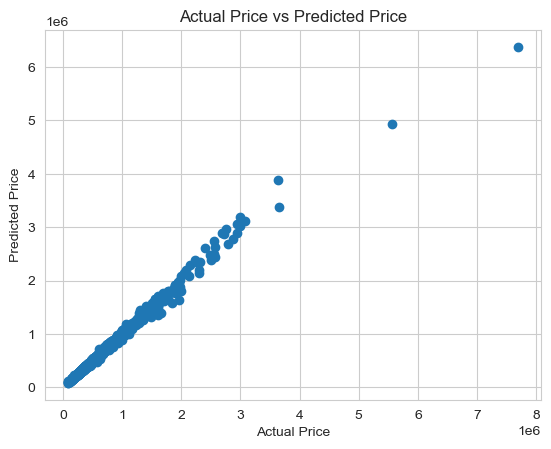

In [306]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [319]:
print('R2 Score: ', r2_score(y_test, y_pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score:  99.23316068712269
Mean Absolute Error:  11071.21404296875
Mean Squared Error:  1030569408.0405867
Root Mean Squared Error:  32102.48289526196


In [320]:
for importance, name in sorted(zip(xg_model.feature_importances_, X_train.columns), reverse=True):
    print(name, "=", importance)

grade = 0.52119935
price_per_sqft_living = 0.21969749
sqft_living = 0.19544303
lat = 0.03141574
sqft_above = 0.016066968
price_per_sqft_above = 0.01534939
zip_enc = 0.00014040459
bathrooms = 0.00013165514
floors = 0.00011363053
sqft_living15 = 0.0001126441
long = 0.000108945846
sqft_lot15 = 9.597774e-05
sqft_lot = 8.0351994e-05
bedrooms = 4.438402e-05


In [362]:
# pickle dump the xg_model
import pickle

pickle.dump(xg_model, open('xg_model.pkl', 'wb'))


In [335]:
from sklearn.preprocessing import MinMaxScaler

# Create the dataframe with one row and seven features
data = {'feature_1': [5.5],
        'feature_2': [3.0],
        'feature_3': [2.5],
        'feature_4': [1.5],
        'feature_5': [7.0],
        'feature_6': [9.0],
        'feature_7': [3.0]}

df = pd.DataFrame(data)

# Normalize the dataframe using MinMaxScaler with the range [-1, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)

# The normalized dataframe
print(scaled)

[[0. 0. 0. 0. 0. 0. 0.]]
